In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [53]:
# reference: https://benalexkeen.com/k-means-clustering-in-python/

In [54]:
### Initialisation
df_features = pd.read_json ('/Users/hedayattabesh/Documents/scripts/Meme-Analysis/memes-beta-features.json')

# Testing
df_features = df_features.head(100)

In [55]:
# create df with X, Y cordinates <- this will make it easier to handle the cordinates
feature_cordinates = pd.DataFrame(columns=['X','Y','path'])
for index, row in df_features.iterrows():
    new_row = {'X':row[1][0], 'Y':row[1][1], 'path':row[0]}
    feature_cordinates = feature_cordinates.append(new_row, ignore_index=True)

feature_cordinates

,X,Y,path
0,0.574598,0.195812,/Users/hedayattabesh/Documents/scripts/Meme-An...
1,0.708925,0.276204,/Users/hedayattabesh/Documents/scripts/Meme-An...
2,0.526939,0.496875,/Users/hedayattabesh/Documents/scripts/Meme-An...
3,0.546661,0.169126,/Users/hedayattabesh/Documents/scripts/Meme-An...
4,0.560327,0.159495,/Users/hedayattabesh/Documents/scripts/Meme-An...
...,...,...,...
95,0.577617,0.160737,/Users/hedayattabesh/Documents/scripts/Meme-An...
96,0.286176,0.928965,/Users/hedayattabesh/Documents/scripts/Meme-An...
97,0.290230,0.502075,/Users/hedayattabesh/Documents/scripts/Meme-An...
98,0.321960,0.561398,/Users/hedayattabesh/Documents/scripts/Meme-An...


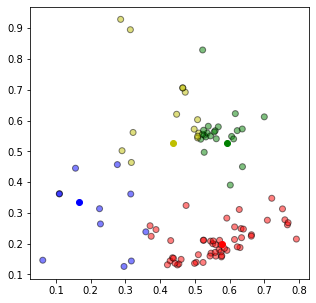

In [24]:
## Repeat Assigment Stage

df_assigned = assignment(df_assigned, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_assigned['X'], df_assigned['Y'], color=df_assigned['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

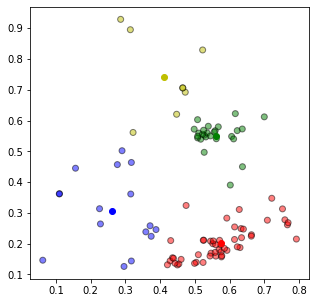

In [26]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df_assigned['closest'].copy(deep=True)
    centroids = update(centroids)
    df_assigned = assignment(df_assigned, centroids)
    if closest_centroids.equals(df_assigned['closest']):
        break
        
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_assigned['X'], df_assigned['Y'], color=df_assigned['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])


In [56]:
# now lets do the same thing but with the libraries


kmeans = KMeans(n_clusters=5)
kmeans.fit(feature_cordinates[['X', 'Y']])

KMeans(n_clusters=5)

In [57]:
labels = kmeans.predict(feature_cordinates[['X', 'Y']])
centroids = kmeans.cluster_centers_

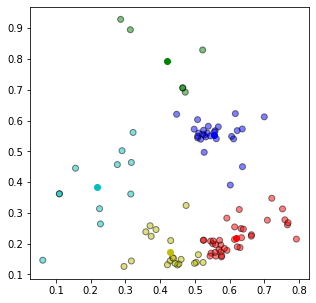

In [58]:
colmap = {0: 'r', 1: 'g', 2: 'b', 3:'y', 4:'c', 5:'m', 6:'tab:brown', 7:'tab:purple', 8:'peru', 9:'slategrey'}

fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x], labels)

plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], color=list(colors), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx])

In [59]:
# now that we have a feel for it lets calculate some satistics 
kmean_clusters = []

wcss = []
silhouette_avg_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(feature_cordinates[['X', 'Y']])
    labels = kmeans.predict(feature_cordinates[['X', 'Y']])
    kmean_clusters.append(kmeans)
    wcss.append(kmeans.inertia_)
    silhouette_avg_scores.append(silhouette_score(feature_cordinates[['X', 'Y']], labels))

kmean_clusters 

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

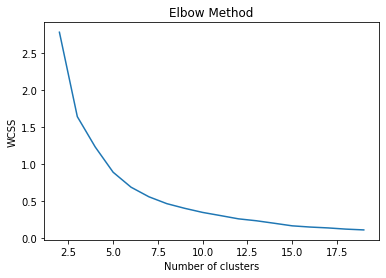

In [60]:
# The total WSS measures the compactness of the clustering and we want it to be as small as possible.
# We are looking for where the curve bends
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

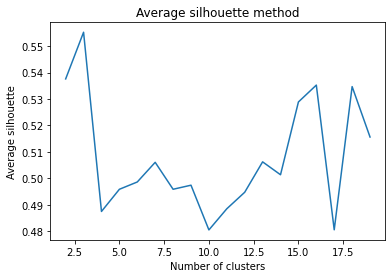

In [61]:
# determines how well each object lies within its cluster
# The location of the maximum is considered as the appropriate number of clusters.
plt.plot(range(2, 20), silhouette_avg_scores)
plt.title('Average silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()